In [2]:
import os
from six import PY3, BytesIO
import zipfile
from scipy.ndimage import imread
from skimage import color
import matplotlib.pyplot as plt
import numpy as np


# I've run into this before, they changed this in the stdlib between python2 and 3.
if PY3:
    from zipfile import BadZipFile
else:
    from zipfile import error as BadZipFile

if not os.path.isfile('../data/train.zip'):
    raise Exception("Can't find train.zip")


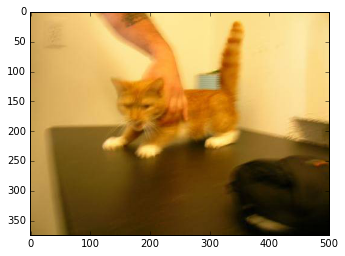

In [4]:
# we are extracting just one file from this zip for now.

with zipfile.ZipFile('../data/train.zip') as z:
    # This is a file that we know is in the zip file, check z.namelist() for a list of all files in the zip.
    b = BytesIO(z.read('train/cat.0.jpg'))
    # Downsamples the 3D array to the 2D array required for the examples below.
    color_img = imread(b)
    bw_img = color.rgb2gray(color_img)
    
plt.imshow(color_img)


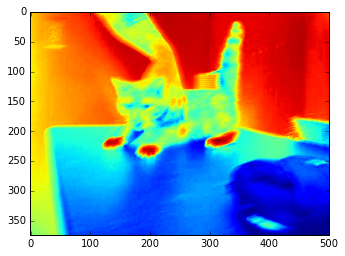

In [5]:
plt.imshow(bw_img)

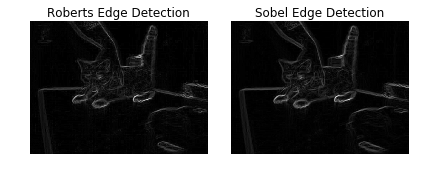

In [6]:
# Yanked from 
# http://scikit-image.org/docs/stable/auto_examples/edges/plot_edge_filter.html#example-edges-plot-edge-filter-py

from skimage.data import camera
from skimage.filters import roberts, sobel, scharr, prewitt


image = bw_img
edge_roberts = roberts(image)
edge_sobel = sobel(image)

fig, (ax0, ax1) = plt.subplots(ncols=2, sharex=True, sharey=True, subplot_kw={'adjustable':'box-forced'})

ax0.imshow(edge_roberts, cmap=plt.cm.gray)
ax0.set_title('Roberts Edge Detection')
ax0.axis('off')

ax1.imshow(edge_sobel, cmap=plt.cm.gray)
ax1.set_title('Sobel Edge Detection')
ax1.axis('off')

plt.tight_layout()